In [76]:
import numpy as np
from stl import mesh
import stl

In [77]:
import numpy as np
import stl
from stl import mesh

# Load STL file and convert to numpy array
stl_mesh = mesh.Mesh.from_file('boom box.stl')
vertices = stl_mesh.vectors.reshape(-1, 3)

# Calculate the minimum and maximum x, y, and z coordinates
x_min, y_min, z_min = np.min(vertices, axis=0)
x_max, y_max, z_max = np.max(vertices, axis=0)

# Define the resolution of the height map
resolution = 100

# Generate a grid of x and y values
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

# Interpolate the z values at each point in the grid
from scipy.interpolate import griddata
Z = griddata(vertices[:, :2], vertices[:, 2], (X, Y), method='linear')

# Smooth the height map
from scipy.ndimage import gaussian_filter
Z_smooth = gaussian_filter(Z, sigma=2)

# Save the height map to a file
np.save('height_map.npy', Z_smooth)

# Load the height map from a file
loaded_height_map = np.load('height_map.npy')

# Process the height map
#processed_height_map = loaded_height_map + 1  # Example processing


exception (False, "b'\\xd7\\xf3?(]ib\\x8b\\x8d\\x8db\\x00\\x00l\\xd0\\x125=\\x84\\x84>\\xe0fw?\\xc1\\xd0\\x18b\\x90\\x03jb\\xc4\\xc0\\x91b' should start with b'facet normal'")


In [39]:
# Load STL file and convert to numpy array
stl_mesh = mesh.Mesh.from_file('boom box.stl')
vertices = stl_mesh.vectors.reshape(-1, 3)

# Set threshold for cusp error detection
threshold = 0.01

# Define surface-based modification function
def surface_based_modification(vertices, threshold):
    num_vertices = len(vertices)
    modified_vertices = np.zeros((num_vertices, 3))
    
    for i in range(num_vertices):
        vertex = vertices[i]
        neighbors = vertices[np.linalg.norm(vertices - vertex, axis=1) < threshold]
        if len(neighbors) > 0:
            modified_vertex = np.mean(neighbors, axis=0)
            modified_vertices[i] = modified_vertex
        else:
            modified_vertices[i] = vertex
            
    # Calculate cusp error for each vertex
    cusp_errors = np.linalg.norm(vertices - modified_vertices, axis=1)

    # Calculate average cusp error
    avg_cusp_error = np.mean(cusp_errors)

    print('Average cusp error: ', avg_cusp_error)
    
    return avg_cusp_error

exception (False, "b'\\xd7\\xf3?(]ib\\x8b\\x8d\\x8db\\x00\\x00l\\xd0\\x125=\\x84\\x84>\\xe0fw?\\xc1\\xd0\\x18b\\x90\\x03jb\\xc4\\xc0\\x91b' should start with b'facet normal'")


In [35]:
    num_vertices = len(vertices)
    modified_vertices = np.zeros((num_vertices, 3))
    num_vertices

54444

In [11]:
layer_of_thickness = 1
# Load the STL file
stl_mesh = mesh.Mesh.from_file('boom box.stl')

# Calculate the minimum and maximum z-coordinates
z_min = np.min(stl_mesh.vectors[:,:,2])
z_max = np.max(stl_mesh.vectors[:,:,2])

print(f"Minimum z-coordinate: {z_min}")
print(f"Maximum z-coordinate: {z_max}")

exception (False, "b'\\xd7\\xf3?(]ib\\x8b\\x8d\\x8db\\x00\\x00l\\xd0\\x125=\\x84\\x84>\\xe0fw?\\xc1\\xd0\\x18b\\x90\\x03jb\\xc4\\xc0\\x91b' should start with b'facet normal'")
Minimum z-coordinate: 0.0
Maximum z-coordinate: 76.20000457763672


In [12]:
Layers = np.arange(z_min, z_max, layer_of_thickness)
print(Layers)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76.]


In [13]:
print(len(Layers))

77


In [24]:
def points_on_layer(vertices, z_height):
    points = []
    error = 0.05
    for vertex in vertices:
        if error > np.absolute(vertex[2] - z_height):
               points.append(vertex)
    return np.array(points) 

In [25]:
points_on_layer(vertices, 0.1)

array([[ 1.0027612e+00,  1.0894220e-14,  9.1910362e-02],
       [ 1.0027612e+00,  1.0894220e-14,  9.1910362e-02],
       [ 1.2593602e+00,  3.3095496e-18,  2.3156404e-02],
       [ 1.2593602e+00,  3.3095496e-18,  2.3156404e-02],
       [ 8.7325798e+01, -2.6353974e-18,  2.8945506e-02],
       [ 8.7325798e+01, -2.6353974e-18,  2.8945506e-02],
       [ 8.7325798e+01, -2.6353974e-18,  2.8945506e-02],
       [ 8.7646553e+01, -1.0462180e-17,  1.1488795e-01],
       [ 8.7646553e+01, -1.0462180e-17,  1.1488795e-01],
       [ 8.7646553e+01, -1.0462180e-17,  1.1488795e-01],
       [ 1.5239999e+00,  1.5030107e+02,  3.8586557e-02],
       [ 1.5239999e+00,  1.5030107e+02,  3.8586557e-02],
       [ 8.6994995e+01,  1.5030107e+02,  3.8586557e-02],
       [ 8.6994995e+01,  1.5030107e+02,  3.8586557e-02],
       [ 1.5239999e+00,  1.5030107e+02,  3.8586557e-02],
       [ 1.5239999e+00,  1.5072873e+02,  1.5318394e-01],
       [ 8.6994995e+01,  1.5030107e+02,  3.8586557e-02],
       [ 1.5239999e+00,  1.5072

In [26]:
vertices[0]

array([58.121414, 44.30077 , 74.53851 ], dtype=float32)

In [27]:
cusp_error_on_layer = []

for layer in Layers:
    #find points on layer 
    points_layers = points_on_layer(vertices, layer) 
    if len(points_layers) == 0:
        cusp_error_on_layer.append(0)
    else:
        #find cusp highet of points in list
        cusp_height = surface_based_modification(points_layers, 0.01)
        cusp_error_on_layer.append(cusp_height)
    
    #add in list
    cusp_error_on_layer.append(cusp_height)
    
#find average of list 
np.mean(cusp_error_on_layer)

Average cusp error:  1.142664653498952e-06
Average cusp error:  3.100001103548702e-06
Average cusp error:  8.04100821238827e-06
Average cusp error:  4.5935442958133045e-06
Average cusp error:  4.0609972696273786e-06
Average cusp error:  2.730375773691763e-06
Average cusp error:  5.710158319720199e-06
Average cusp error:  6.269449038854018e-06
Average cusp error:  3.6983713304216306e-06
Average cusp error:  1.0666394420229285e-05
Average cusp error:  3.957131878044142e-06
Average cusp error:  4.778935100824235e-06
Average cusp error:  3.0268375101523705e-06
Average cusp error:  2.4103899797738785e-06
Average cusp error:  6.020443812116262e-06
Average cusp error:  9.39217347720313e-06
Average cusp error:  4.393518651809387e-06
Average cusp error:  0.00013106114937345436
Average cusp error:  0.00012528511372451742
Average cusp error:  5.129327362772611e-06
Average cusp error:  4.929704694651886e-06
Average cusp error:  4.311094922421396e-06
Average cusp error:  2.6059871516994457e-06
Aver

3.657486195596059e-05

In [28]:
cusp_error_on_layer

[1.142664653498952e-06,
 1.142664653498952e-06,
 3.100001103548702e-06,
 3.100001103548702e-06,
 8.04100821238827e-06,
 8.04100821238827e-06,
 0,
 8.04100821238827e-06,
 4.5935442958133045e-06,
 4.5935442958133045e-06,
 4.0609972696273786e-06,
 4.0609972696273786e-06,
 2.730375773691763e-06,
 2.730375773691763e-06,
 5.710158319720199e-06,
 5.710158319720199e-06,
 6.269449038854018e-06,
 6.269449038854018e-06,
 3.6983713304216306e-06,
 3.6983713304216306e-06,
 1.0666394420229285e-05,
 1.0666394420229285e-05,
 3.957131878044142e-06,
 3.957131878044142e-06,
 4.778935100824235e-06,
 4.778935100824235e-06,
 3.0268375101523705e-06,
 3.0268375101523705e-06,
 2.4103899797738785e-06,
 2.4103899797738785e-06,
 6.020443812116262e-06,
 6.020443812116262e-06,
 9.39217347720313e-06,
 9.39217347720313e-06,
 4.393518651809387e-06,
 4.393518651809387e-06,
 0.00013106114937345436,
 0.00013106114937345436,
 0.00012528511372451742,
 0.00012528511372451742,
 5.129327362772611e-06,
 5.129327362772611e-06,
 

In [29]:
#find average of list 
Threshold_value_of_Cusp = np.mean(cusp_error_on_layer)
print(Threshold_value_of_Cusp)

3.657486195596059e-05


In [30]:
layers_to_look_for = []
for layers_of_interest in cusp_error_on_layer:
    if Threshold_value_of_Cusp < layers_of_interest:
        layers_to_look_for.append(layers_of_interest)
    
    
    

In [31]:
layers_to_look_for

[0.00013106114937345436,
 0.00013106114937345436,
 0.00012528511372451742,
 0.00012528511372451742,
 0.0008945205592701813,
 0.0008945205592701813,
 0.0013060510423068205,
 0.0013060510423068205,
 0.00012751927179420827,
 0.00012751927179420827]

In [32]:
number_of_layer1 = []
for i in range(len(cusp_error_on_layer)):
    if Threshold_value_of_Cusp < cusp_error_on_layer[i]:
        number_of_layer1.append(i)

In [33]:
number_of_layer1

[36, 37, 38, 39, 74, 75, 86, 87, 140, 141]

In [41]:
(vertices)

In [46]:
vertex = vertices[3]
neighbors = vertices[np.linalg.norm(vertices - vertex, axis=1) < threshold]

In [47]:
neighbors

array([[51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ],
       [51.611137, 44.30077 , 74.53851 ]], dtype=float32)

In [53]:
import numpy as np
import stl
from stl import mesh

# Load STL file and convert to numpy array
stl_mesh = mesh.Mesh.from_file('boom box.stl')
vertices = stl_mesh.vectors.reshape(-1, 3)

# Set threshold for cusp error detection
threshold = 0.01

# Define surface-based modification function
def surface_based_modification(vertices, threshold):
    num_vertices = len(vertices)
    modified_vertices = np.zeros((num_vertices, 3))
    
    for i in range(num_vertices):
        vertex = vertices[i]
        neighbors = vertices[np.linalg.norm(vertices - vertex, axis=1) < threshold]
        if len(neighbors) > 0:
            modified_vertex = np.mean(neighbors, axis=0)
            modified_vertices[i] = modified_vertex
        else:
            modified_vertices[i] = vertex
            
    # Calculate cusp error for each vertex
    cusp_errors = np.linalg.norm(vertices - modified_vertices, axis=1)

    # Calculate average cusp error
    avg_cusp_error = np.mean(cusp_errors)

    print('Average cusp error: ', avg_cusp_error)
    
    return avg_cusp_error
layer_of_thickness = .5
# Calculate the minimum and maximum z-coordinates
z_min = np.min(stl_mesh.vectors[:,:,2])
z_max = np.max(stl_mesh.vectors[:,:,2])

print(f"Minimum z-coordinate: {z_min}")
print(f"Maximum z-coordinate: {z_max}")

Layers = np.arange(z_min, z_max, layer_of_thickness)
print(Layers)
print(len(Layers))
cusp_error_on_layer = []

for layer in Layers:
    # Find points on layer 
    points_layers = vertices[np.abs(vertices[:,2] - layer) < threshold]
    
    if len(points_layers) == 0:
        cusp_error_on_layer.append(0)
    else:
        # Find cusp height of points in list
        cusp_height = surface_based_modification(points_layers, 0.01)
        cusp_error_on_layer.append(cusp_height)
    
# Calculate the threshold value of cusp error
Threshold_value_of_Cusp = np.mean(cusp_error_on_layer)
print(Threshold_value_of_Cusp)

layers_to_look_for = []
for index, layer in enumerate(Layers):
    cusp_height = cusp_error_on_layer[index]
    if cusp_height > Threshold_value_of_Cusp:
        layers_to_look_for.append(index)

print(layers_to_look_for)


exception (False, "b'\\xd7\\xf3?(]ib\\x8b\\x8d\\x8db\\x00\\x00l\\xd0\\x125=\\x84\\x84>\\xe0fw?\\xc1\\xd0\\x18b\\x90\\x03jb\\xc4\\xc0\\x91b' should start with b'facet normal'")
Minimum z-coordinate: 0.0
Maximum z-coordinate: 76.20000457763672
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5
 56.  56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5
 63.  63.5 64.  64.5 65.  65.5 66.  66.5 67.  67.5 68.  68.5 69.  69.5
 70.  70.5 71.  71.5 72.  72.5 73.  73.5 74.  74

In [1]:
import stl
from stl import mesh

# Load STL file and convert to numpy array
stl_mesh = mesh.Mesh.from_file('Cube_sample.stl')
vertices = stl_mesh.vectors.reshape(-1, 3)

# Calculate the minimum and maximum x, y, and z coordinates
x_min, y_min, z_min = np.min(vertices, axis=0)
x_max, y_max, z_max = np.max(vertices, axis=0)

# Define the resolution of the height map
resolution = 100

# Generate a grid of x and y values
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

# Interpolate the z values at each point in the grid
from scipy.interpolate import griddata
Z = griddata(vertices[:, :2], vertices[:, 2], (X, Y), method='linear')

# Smooth the height map
from scipy.ndimage import gaussian_filter
Z_smooth = gaussian_filter(Z, sigma=2)

# Save the height map to a file
np.save('height_map.npy', Z_smooth)

# Load the height map from a file
loaded_height_map = np.load('height_map.npy')

# Process the height map
#processed_height_map = loaded_height_map + 1  # Example processing

NameError: name 'np' is not defined

In [80]:
import numpy as np
import stl
from stl import mesh

# Load STL file and convert to numpy array
stl_mesh = mesh.Mesh.from_file('boom box.stl')
vertices = stl_mesh.vectors.reshape(-1, 3)

# Calculate the minimum and maximum x, y, and z coordinates
x_min, y_min, z_min = np.min(vertices, axis=0)
x_max, y_max, z_max = np.max(vertices, axis=0)

# Define the resolution of the height map
resolution = 100

# Generate a grid of x and y values
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

# Interpolate the z values at each point in the grid
from scipy.interpolate import griddata
Z = griddata(vertices[:, :2], vertices[:, 2], (X, Y), method='linear')

# Smooth the height map
from scipy.ndimage import gaussian_filter
Z_smooth = gaussian_filter(Z, sigma=2)

# Save the height map to a file
np.save('height_map.npy', Z_smooth)

# Load the height map from a file
height_map = loaded_height_map = np.load('height_map.npy')

# Define the pixel size in meters
pixel_size = 0.1e-3  # 0.1 mm

def calculate_volumetric_cusp_error(height_map, pixel_size):

    # Calculate the gradient of the height map
    dzdx, dzdy = np.gradient(height_map, pixel_size)

    # Calculate the second derivatives of the height map
    d2zdxdy, d2zdx2 = np.gradient(dzdx, pixel_size)
    d2zdydx, d2zdy2 = np.gradient(dzdy, pixel_size)

    # Calculate the volumetric cusp error
    cusp_error = (d2zdx2 + d2zdy2) ** 2 + 4 * (d2zdxdy - d2zdydx) ** 2

    # Multiply by the pixel area to get the volumetric cusp error in cubic meters
    cusp_error *= pixel_size ** 4

    return np.sum(volumetric_cusp_error)


def calculate_volumetric_cusp_error_on_layer(layer_height_map, pixel_size):
    """
    Calculates the volumetric cusp error of a layer in an additive manufacturing process from a given height map.

    Args:
        layer_height_map: A 2D numpy array representing the height map of the printed layer in meters.
        pixel_size: The size of a pixel in the height map in meters.

    Returns:
        The volumetric cusp error in cubic millimeters.
    """
    # Calculate the gradient of the height map
    dzdx, dzdy = np.gradient(layer_height_map, pixel_size)

    # Calculate the second derivatives of the height map
    d2zdxdy, d2zdx2 = np.gradient(dzdx, pixel_size)
    d2zdydx, d2zdy2 = np.gradient(dzdy, pixel_size)

    # Calculate the volumetric cusp error in cubic meters
    cusp_error = (d2zdx2 + d2zdy2) ** 2 + 4 * (d2zdxdy - d2zdydx) ** 2
    cusp_error *= pixel_size ** 4

    # Convert the volumetric cusp error to cubic millimeters
    volumetric_cusp_error *= 1e9

    return np.sum(volumetric_cusp_error)

# Calculate the volumetric cusp error
volumetric_cusp_error = calculate_cusp_error_layer(height_map, pixel_size)

print("Volumetric cusp error:", volumetric_cusp_error, "mm^3")

Volumetric cusp error: nan mm^3


In [89]:
import numpy as np
import stl
from stl import mesh

# Load STL file and convert to numpy array
stl_mesh = mesh.Mesh.from_file('cube_sample.stl')
vertices = stl_mesh.vectors.reshape(-1, 3)

# Calculate the minimum and maximum x, y, and z coordinates
x_min, y_min, z_min = np.min(vertices, axis=0)
x_max, y_max, z_max = np.max(vertices, axis=0)

# Define the resolution of the height map
resolution = 100

# Generate a grid of x and y values
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

# Interpolate the z values at each point in the grid
from scipy.interpolate import griddata
Z = griddata(vertices[:, :2], vertices[:, 2], (X, Y), method='linear')

# Smooth the height map
from scipy.ndimage import gaussian_filter
Z_smooth = gaussian_filter(Z, sigma=2)

# Save the height map to a file
np.save('height_map.npy', Z_smooth)

# Load the height map from a file
height_map = np.load('height_map.npy')

# Define the pixel size in meters
pixel_size = 0.1e-3  # 0.1 mm

def calculate_volumetric_cusp_error(height_map, pixel_size):

    # Calculate the gradient of the height map
    dzdx, dzdy = np.gradient(height_map, pixel_size)

    # Calculate the second derivatives of the height map
    d2zdxdy, d2zdx2 = np.gradient(dzdx, pixel_size)
    d2zdydx, d2zdy2 = np.gradient(dzdy, pixel_size)

    # Calculate the volumetric cusp error
    cusp_error = (d2zdx2 + d2zdy2) ** 2 + 4 * (d2zdxdy - d2zdydx) ** 2

    # Multiply by the pixel area to get the volumetric cusp error in cubic meters
    cusp_error *= pixel_size ** 4

    return np.sum(cusp_error)


def calculate_volumetric_cusp_error_on_layer(layer_height_map, pixel_size):
    """
    Calculates the volumetric cusp error of a layer in an additive manufacturing process from a given height map.

    Args:
        layer_height_map: A 2D numpy array representing the height map of the printed layer in meters.
        pixel_size: The size of a pixel in the height map in meters.

    Returns:
        The volumetric cusp error in cubic millimeters.
    """
    # Calculate the gradient of the height map
    dzdx, dzdy = np.gradient(layer_height_map, pixel_size)

    # Calculate the second derivatives of the height map
    d2zdxdy, d2zdx2 = np.gradient(dzdx, pixel_size)
    d2zdydx, d2zdy2 = np.gradient(dzdy, pixel_size)

    # Calculate the volumetric cusp error in cubic meters
    cusp_error = (d2zdx2 + d2zdy2) ** 2 + 4 * (d2zdxdy - d2zdydx) ** 2
    cusp_error *= pixel_size ** 4

    # Convert the volumetric cusp error to cubic millimeters
    cusp_error *= 1e9

    return np.sum(cusp_error)

    # Calculate the volumetric cusp error
    volumetric_cusp_error = calculate_cusp_error_layer(height_map, pixel_size)

#print("Volumetric cusp error:", volumetric_cusp_error, "mm^3")
print("Volumetric cusp error:", calculate_volumetric_cusp_error_on_layer(height_map, pixel_size), "mm^3")

Volumetric cusp error: 5.103930056779948e-19 mm^3


In [69]:
import scipy.interpolate
from scipy.ndimage import gaussian_filter

In [66]:
import griddata

exception (False, "b'\\xd7\\xf3?(]ib\\x8b\\x8d\\x8db\\x00\\x00l\\xd0\\x125=\\x84\\x84>\\xe0fw?\\xc1\\xd0\\x18b\\x90\\x03jb\\xc4\\xc0\\x91b' should start with b'facet normal'")


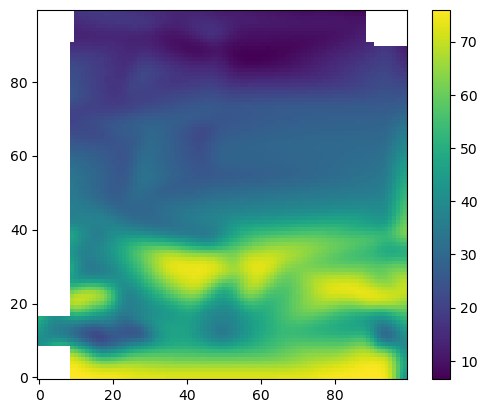

In [74]:
import numpy as np
import stl
from stl import mesh

# Load STL file and convert to numpy array
stl_mesh = mesh.Mesh.from_file('boom box.stl')
vertices = stl_mesh.vectors.reshape(-1, 3)

# Calculate the minimum and maximum x, y, and z coordinates
x_min, y_min, z_min = np.min(vertices, axis=0)
x_max, y_max, z_max = np.max(vertices, axis=0)

# Define the resolution of the height map
resolution = 100

# Generate a grid of x and y values
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

# Interpolate the z values at each point in the grid
from scipy.interpolate import griddata
Z = griddata(vertices[:, :2], vertices[:, 2], (X, Y), method='linear')

# Smooth the height map
from scipy.ndimage import gaussian_filter
Height_map = gaussian_filter(Z, sigma=2)

# Plot the height map
import matplotlib.pyplot as plt
plt.imshow(Z_smooth, cmap='viridis', origin='lower')
plt.colorbar()
plt.show()

In [87]:
import numpy as np
import stl
from stl import mesh

# Load STL file and convert to numpy array
stl_mesh = mesh.Mesh.from_file('cube_sample.stl')
vertices = stl_mesh.vectors.reshape(-1, 3)

# Calculate the minimum and maximum x, y, and z coordinates
x_min, y_min, z_min = np.min(vertices, axis=0)
x_max, y_max, z_max = np.max(vertices, axis=0)

# Define the resolution of the height map
resolution = 100

# Generate a grid of x and y values
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

# Interpolate the z values at each point in the grid
from scipy.interpolate import griddata
Z = griddata(vertices[:, :2], vertices[:, 2], (X, Y), method='linear')

# Smooth the height map
from scipy.ndimage import gaussian_filter
Z_smooth = gaussian_filter(Z, sigma=2)

# Save the height map to a file
np.save('height_map.npy', Z_smooth)

# Load the height map from a file
height_map = np.load('height_map.npy')

print(height_map)

In [88]:
print(height_map)

[[20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]
 ...
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]]
